# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA
#!pip install loguru
#from loguru import logger

In [30]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [2]:
fifa = pd.read_csv("fifa.csv")

In [3]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [4]:
# Sua análise começa aqui.
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [5]:
#Criando um dataframe auxiliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : fifa.columns,
                    'tipo': fifa.dtypes,
                    'missing' : fifa.isna().sum(),
                    'size' : fifa.shape[0],
                    'unicos': fifa.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],5)

In [6]:
cons

,colunas,tipo,missing,size,unicos,percentual
Age,Age,int64,0,18207,29,0.00000
Overall,Overall,int64,0,18207,48,0.00000
Potential,Potential,int64,0,18207,47,0.00000
Crossing,Crossing,float64,48,18207,89,0.00264
Finishing,Finishing,float64,48,18207,93,0.00264
HeadingAccuracy,HeadingAccuracy,float64,48,18207,91,0.00264
ShortPassing,ShortPassing,float64,48,18207,85,0.00264
Volleys,Volleys,float64,48,18207,87,0.00264
Dribbling,Dribbling,float64,48,18207,94,0.00264
Curve,Curve,float64,48,18207,89,0.00264


In [7]:
fifa.dropna(inplace=True)

Age


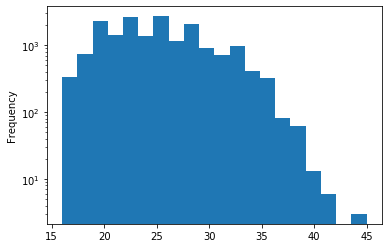

Overall


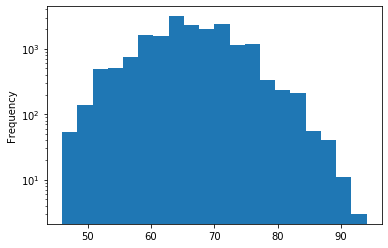

Potential


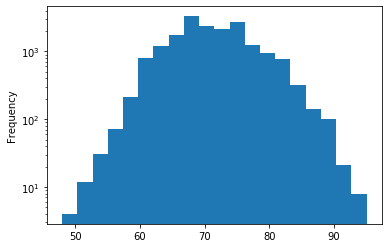

Crossing


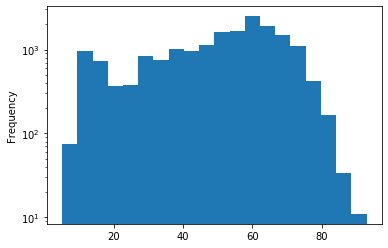

Finishing


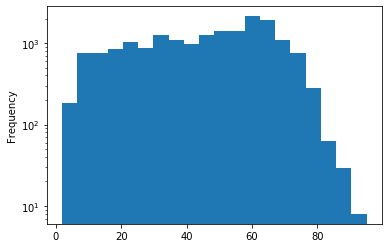

HeadingAccuracy


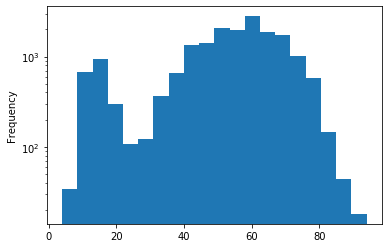

ShortPassing


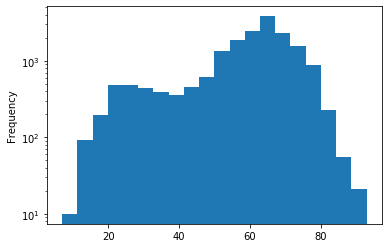

Volleys


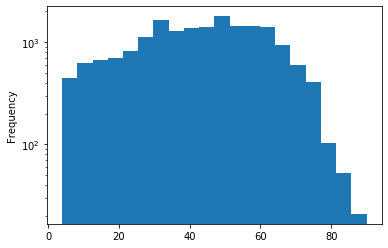

Dribbling


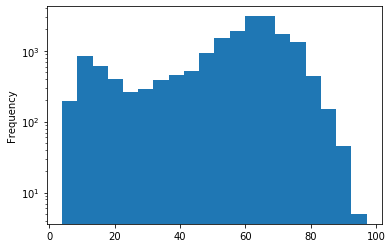

Curve


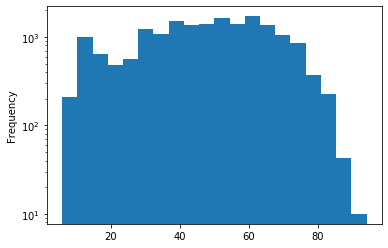

FKAccuracy


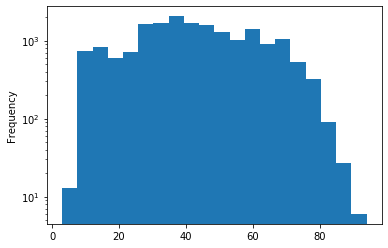

LongPassing


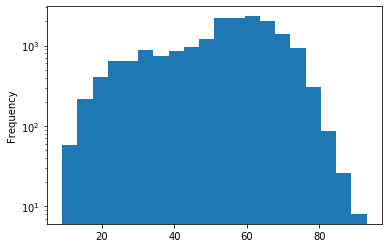

BallControl


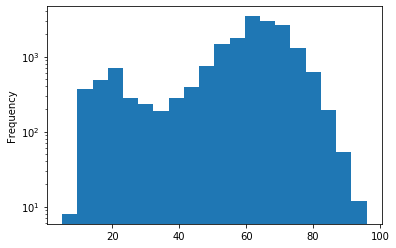

Acceleration


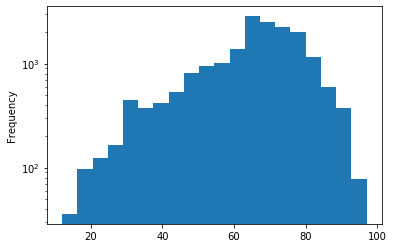

SprintSpeed


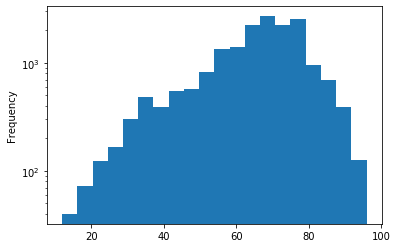

Agility


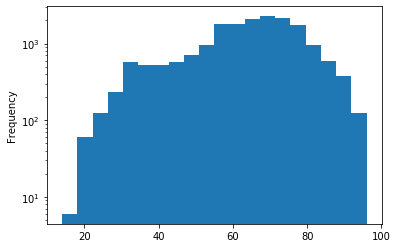

Reactions


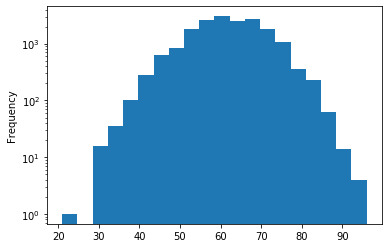

Balance


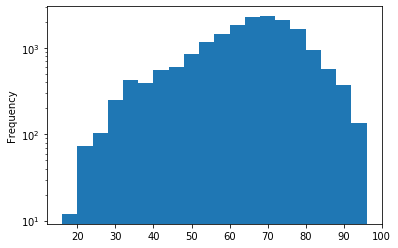

ShotPower


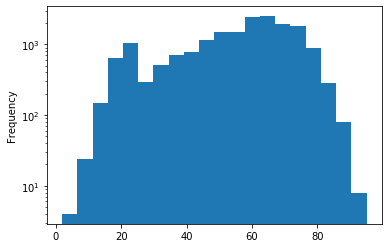

Jumping


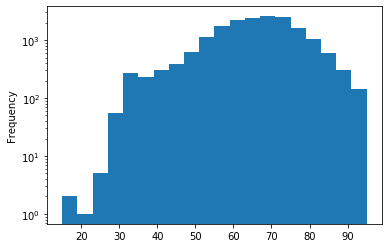

Stamina


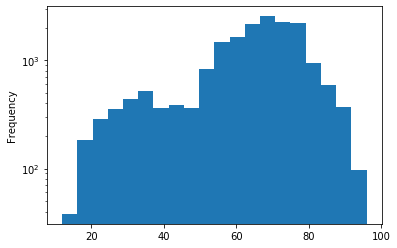

Strength


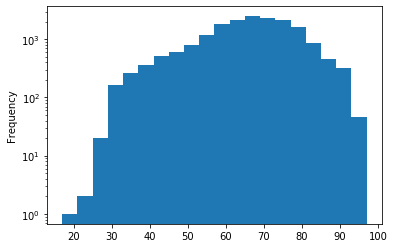

LongShots


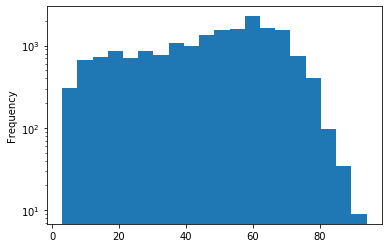

Aggression


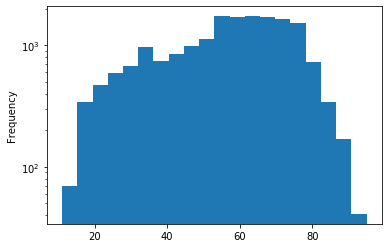

Interceptions


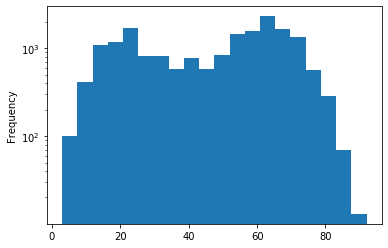

Positioning


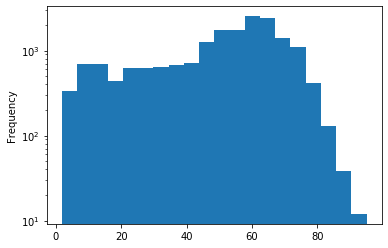

Vision


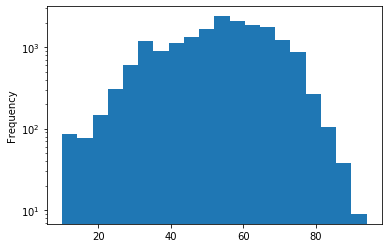

Penalties


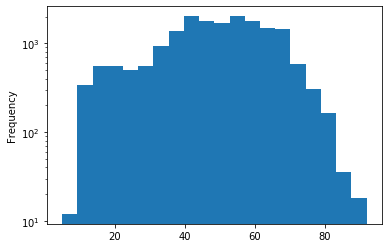

Composure


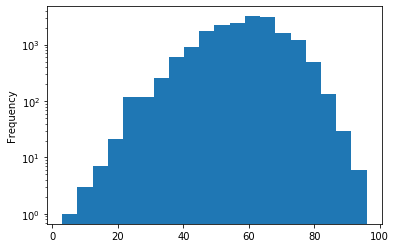

Marking


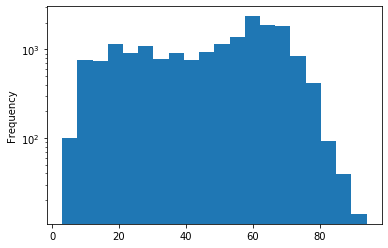

StandingTackle


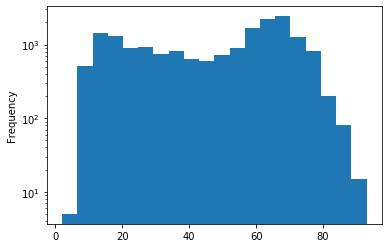

SlidingTackle


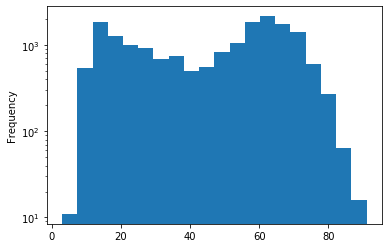

GKDiving


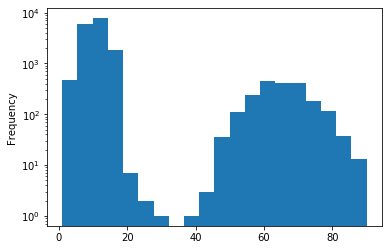

GKHandling


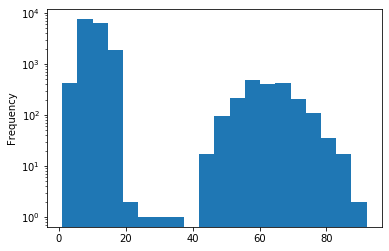

GKKicking


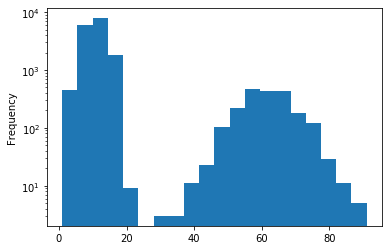

GKPositioning


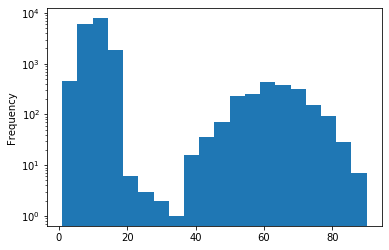

GKReflexes


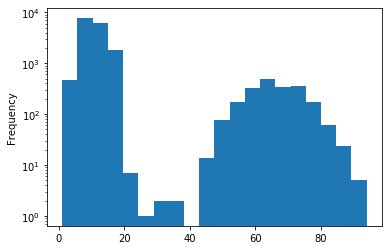

In [6]:
#Análise Univariada
#for colunas in fifa:
    #print(colunas)
    #fifa[colunas].plot.hist(bins = 20, log= True)
    #plt.show()

In [48]:
#As variáveis padronizadas  podem ser diretamente comparáveis, pois elas agora não possuem dimensão e são expressas em unidades de desvio padrão
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(fifa)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
#scaled_data = scaler.transform(fifa)

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [9]:
def q1():
    # Retorne aqui o resultado da questão 1.
    pca = PCA(1)
    pca.fit(fifa)
    explaned_variance = pca.explained_variance_ratio_[0]
    return float(round(pca.explained_variance_ratio_[0], 3))
    pass

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [10]:
def q2():
    # Retorne aqui o resultado da questão 2.
    pca = PCA(0.95)
    pca.fit(fifa)
    x_pca = pca.transform(fifa)
    return x_pca.shape[1]
    pass

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [11]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [12]:
def q3():
    # Retorne aqui o resultado da questão 3.
    pca = PCA(2)
    pca_fit = pca.fit(fifa)
    return tuple(pca.components_.dot(x).round(3))
    pass

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [13]:
def q4():
    # Retorne aqui o resultado da questão 4.
    x = fifa.drop(columns="Overall")
    y = fifa["Overall"]

    reg = LinearRegression()
    rfe = RFE(reg,5)
    fit=rfe.fit(x, y)
    features = fit.support_
    return list(x.columns[features])
    pass